<a href="https://colab.research.google.com/github/omkarsp644/Heart-Attack-And-Diabetes-prediction-using-python/blob/master/BE_PROJECT_GRP_V_DIABETIC_RETINOPATHY_USING_INCEPTION_RESNET_V_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from multiprocessing.pool import ThreadPool
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
%matplotlib inline
import os
import random
import glob
import itertools
from keras.utils import to_categorical
import seaborn as sns
import tensorflow as tf
from keras import regularizers

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


CSV_PATH="/content/gdrive/My Drive/Diabetic_Retinopathy/trainLabels.csv"
DATA_PATH="/content/gdrive/My Drive/Diabetic_Retinopathy/SendGoogleCollab/"

Mounted at /content/gdrive


In [ ]:
import pandas as pd
random.seed(10)
trainLabels = pd.read_csv(CSV_PATH)
trainLabels.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [ ]:
from PIL import Image
from keras.preprocessing import image
import os
import numpy as np


img_rows, img_cols = 256,256
Batch_size = 16

listing = os.listdir(DATA_PATH) 

immatrix = []
imlabel = []



In [ ]:
count=0
for file in os.listdir(DATA_PATH):
    base = os.path.basename(DATA_PATH + file)
    fileName = os.path.splitext(base)[0]
    labels=trainLabels.loc[trainLabels.image==fileName, 'level'].values[0]
    if not imlabel.count(labels)>1000:
        image = Image.open(DATA_PATH + file)
        img = np.array(image.resize((img_rows,img_cols)))
        immatrix.append(np.array(img))
        imlabel.append(labels)
        print("Saving")
        count=count+1
    else:
        print("Not Saving")

Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving
Saving

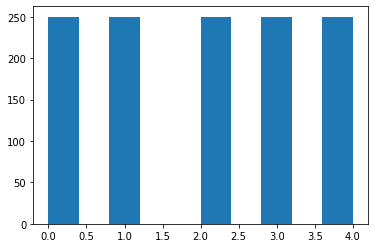

In [ ]:
from sklearn.utils import shuffle

data,label = shuffle(immatrix, imlabel, random_state=42)
train_data = [data,label]

import matplotlib.pyplot as plt

plt.hist(label)
plt.show()


In [ ]:
IMAGE_MATRIX=immatrix
IMAGE_LABEL=imlabel

In [ ]:
print("Class NO DR Label 0 has {} images in data".format(IMAGE_LABEL.count(0)))
print("Class MILD DR Label 1 has {} images in data".format(IMAGE_LABEL.count(1)))
print("Class MODERATE DR Label 2 has {} images in data".format(IMAGE_LABEL.count(2)))
print("Class SEVERE DR Label 3 has {} images in data".format(IMAGE_LABEL.count(3)))
print("Class PROLIEFERATIVE DR Label 4 has {} images in data".format(IMAGE_LABEL.count(4)))


Class NO DR Label 0 has 250 images in data
Class MILD DR Label 1 has 250 images in data
Class MODERATE DR Label 2 has 250 images in data
Class SEVERE DR Label 3 has 250 images in data
Class PROLIEFERATIVE DR Label 4 has 250 images in data


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data[0], train_data[1], test_size = 0.1, random_state = 42)


print(np.array(x_train).shape)
print(np.array(y_train).shape)

(1125, 256, 256, 3)
(1125,)


In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(np.array(y_train), 5)
y_test = np_utils.to_categorical(np.array(y_test), 5)


x_train = np.array(x_train).astype("float32")/255.
x_test = np.array(x_test).astype("float32")/255.


print(np.array(y_train).shape)

(1125, 5)


level: 0


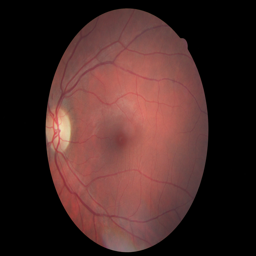

In [ ]:
im = Image.fromarray(immatrix[0],'RGB')
print("level:",imlabel[0])
im



In [ ]:
from sklearn.utils import shuffle

data,label = shuffle(immatrix, imlabel, random_state=42)
train_data = [data,label]

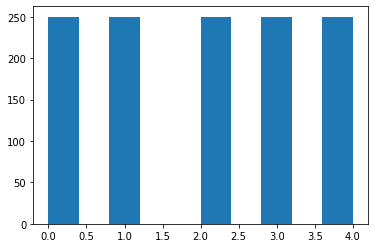

In [ ]:
import matplotlib.pyplot as plt

plt.hist(label)
plt.show()

In [ ]:
BASE_MODEL='InceptionResNetV2'

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.applications.resnet50 import ResNet50 as PTModel, preprocess_input

In [ ]:
from keras.applications import InceptionResNetV2
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input
import keras

def create_model( n_out):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(256,256,3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_out, activation='sigmoid'))
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[f1])
    return model


In [ ]:
def f1(y_true, y_pred):
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
   # f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

def show_history(history):
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('f1')
    ax[1].plot(history.epoch, history.history["f1"], label="Train f1")
    ax[1].plot(history.epoch, history.history["val_f1"], label="Validation f1")
    ax[2].set_title('acc')
    ax[2].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[2].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()

In [ ]:
keras.backend.clear_session()
LEARN_RATE = 0.0001
model = create_model( 
    n_out=5)
history_InceptionResNetV2  = model.compile(optimizer = Adam(lr=LEARN_RATE), 
                   loss = 'categorical_crossentropy',
                   metrics = ['acc',f1])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       7

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('boat_detector')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15)
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
def brightness_adjustment(img):

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    ratio = .5 + np.random.uniform()
    hsv[:,:,2] =  np.clip(hsv[:,:,2].astype(np.int32) * ratio, 0, 255).astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy
X_train = numpy.array(x_train, copy=True) 
Y_train = numpy.array(y_train, copy=True) 
shift = 0.1
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=0,
   preprocessing_function=brightness_adjustment,
                                   width_shift_range=shift,
                                   height_shift_range=shift, shear_range=0.1,
                                   zoom_range=0.1, channel_shift_range=4.,
                                   horizontal_flip=True, vertical_flip=True,
                                   rescale=1. /255,
                                fill_mode='nearest') 

datagen.fit(x_train)

In [ ]:
train_x  = numpy.concatenate((x_train, X_train), axis=0)
train_y  = numpy.concatenate((y_train, Y_train), axis=0)
print(train_x.shape)
print(train_y.shape)

(2250, 256, 256, 3)
(2250, 5)


In [ ]:
Batch_size = 32

In [ ]:
history_InceptionResNetV2 =model.fit(train_x, train_y, batch_size = Batch_size, epochs=50,validation_split=0.2,
                            shuffle=True)
# callbacks=callbacks_list   ,

Epoch 1/50
57/57 [==============================] - 38s 109ms/step - loss: 2.0755 - acc: 0.2159 - f1: 0.2616 - val_loss: 1.5603 - val_acc: 0.2911 - val_f1: 0.2745
Epoch 2/50
57/57 [==============================] - 5s 87ms/step - loss: 1.5472 - acc: 0.2976 - f1: 0.2861 - val_loss: 1.5029 - val_acc: 0.3511 - val_f1: 0.2897
Epoch 3/50
57/57 [==============================] - 5s 88ms/step - loss: 1.4670 - acc: 0.3653 - f1: 0.3044 - val_loss: 1.5079 - val_acc: 0.3333 - val_f1: 0.3021
Epoch 4/50
57/57 [==============================] - 5s 88ms/step - loss: 1.3987 - acc: 0.4354 - f1: 0.3203 - val_loss: 1.4380 - val_acc: 0.3733 - val_f1: 0.3079
Epoch 5/50
57/57 [==============================] - 5s 87ms/step - loss: 1.3325 - acc: 0.4562 - f1: 0.3369 - val_loss: 1.3463 - val_acc: 0.4533 - val_f1: 0.3265
Epoch 6/50
57/57 [==============================] - 5s 87ms/step - loss: 1.2295 - acc: 0.5380 - f1: 0.3559 - val_loss: 1.2461 - val_acc: 0.4822 - val_f1: 0.3468
Epoch 7/50
57/57 [==============

In [ ]:
DATA_PATH="/content/gdrive/My Drive/Diabetic_Retinopathy/CreatedModels"
#model.load_weights(weight_path)
model.save(DATA_PATH+'ResNetV2Omkar.h5')

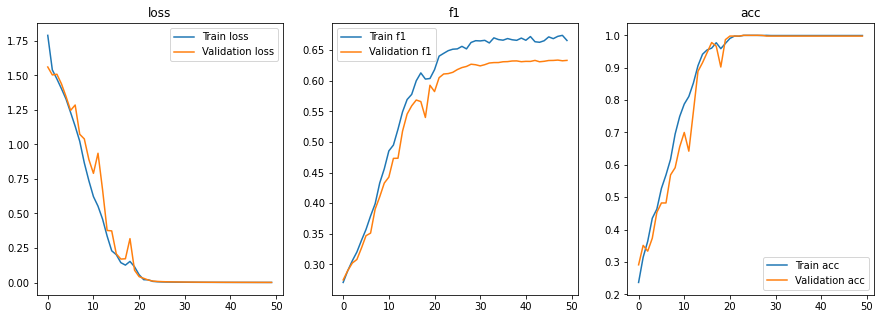

In [ ]:
show_history(history_InceptionResNetV2)

In [ ]:
score = model.evaluate(x_test, y_test,  verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 5.338142395019531
Test accuracy: 0.2879999876022339


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
pred_Y_cat = np.argmax(pred_Y, -1)
test_Y_cat = np.argmax(y_test, -1)
print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(test_Y_cat, pred_Y_cat)))

8/8 [==============================] - 1s 67ms/step
Accuracy on Test Data: 0.29%


                         precision    recall  f1-score   support

         class 0(NO DR)       0.43      0.38      0.41        26
       class 1(MILD DR)       0.23      0.27      0.25        26
   class 2(MODERATE DR)       0.30      0.29      0.30        24
    class 3(SEVERAL DR)       0.14      0.20      0.17        20
class 4(PROFERATIVE DR)       0.38      0.28      0.32        29

               accuracy                           0.29       125
              macro avg       0.30      0.28      0.29       125
           weighted avg       0.31      0.29      0.29       125



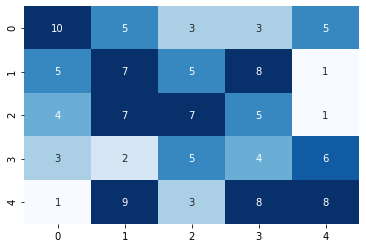

In [ ]:
Y_pred = model.predict(x_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap
target_names = ['class 0(NO DR)', 'class 1(MILD DR)', 'class 2(MODERATE DR)', 'class 3(SEVERAL DR)', 'class 4(PROFERATIVE DR)']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1), y_pred), annot=True, fmt="d", cbar = False, cmap = plt.cm.Blues, vmax = x_test.shape[0]//16)

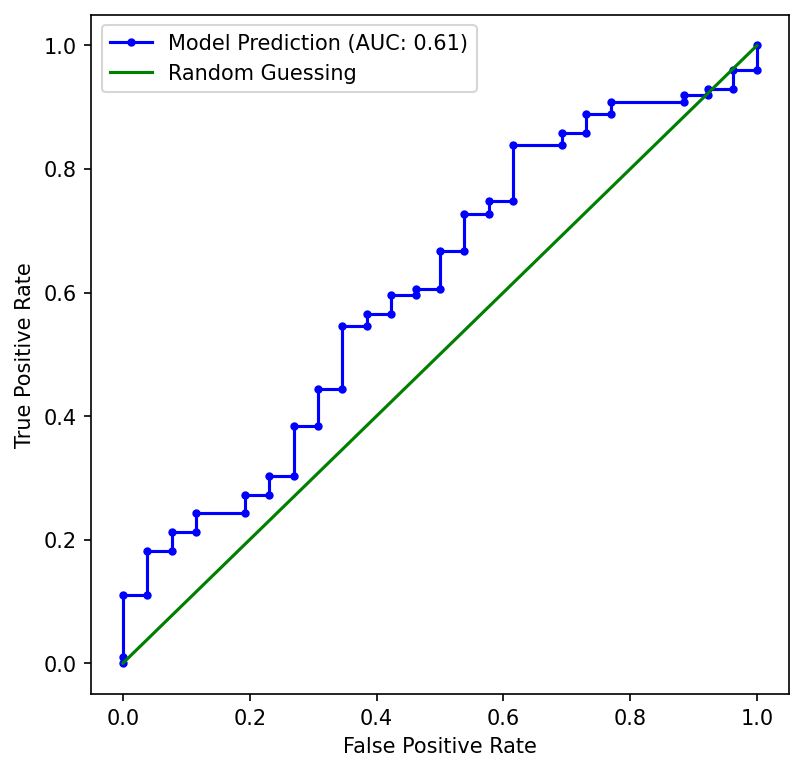

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
sick_vec = test_Y_cat>0
sick_score = np.sum(pred_Y[:,1:],1)
fpr, tpr, _ = roc_curve(sick_vec, sick_score)
fig, ax1 = plt.subplots(1,1, figsize = (6, 6), dpi = 150)
ax1.plot(fpr, tpr, 'b.-', label = 'Model Prediction (AUC: %2.2f)' % roc_auc_score(sick_vec, sick_score))
ax1.plot(fpr, fpr, 'g-', label = 'Random Guessing')
ax1.legend()
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');



In [ ]:
results = pd.DataFrame({'ImageId': pd.Series(range(1, len(test_Y_cat) + 1)), 'Label': pd.Series(pred_Y_cat)})
results.to_csv('results.csv', index=False)
results.head(400)

,ImageId,Label
0,1,0
1,2,1
2,3,1
3,4,3
4,5,1
...,...,...
120,121,2
121,122,3
122,123,3
123,124,2
